### Part 1: Import necessary libraries and load the dataset

In [76]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [43]:
#load training dataset

source = pd.read_csv("train.csv")
source.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
#Get the shape of the dataset
print(source.shape)

(1460, 81)


### Part 2: Recode categorical variables into numbers

In [45]:
#create replacement library

cleanup = {"LotShape" : {"Reg":0, "IR1":-1, "IR2":-2, "IR3":-3},
           "LandSlope": {"Gtl":0, "Mod":-1, "Sev":-2},
           "HouseStyle": {"1Story":1, "1.5Fin":1.5, "1.5Unf":1.25, "2Story":2, "2.5Fin":2.5, "2.5Unf":2.25, "SFoyer": -1, "SLvl": -1.5}, 
           #code external quality based on the numbers assigned to OverallCond & OverallQual
           "ExterQual": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1},
           "ExterCond" : {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1}, 
           "BsmtQual" : {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "BsmtCond": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           #split levels or foyers typically score average or above in bsmtExposure
           "BsmtExposure": {"Gd": 4, "Av": 3, "Mn": 2, "No": 1, "NA": 0},
           "BsmtFinType1": {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0},
           "BsmtFinType2": {"GLQ": 6, "ALQ": 5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "NA":0},
           "HeatingQC": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1},
           "CentralAir": {"N": 0, "Y": 1},
           "KitchenQual": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1},
           "Functional": {"Typ":0, "Min1":-1, "Min2":-2, "Mod":-3, "Maj1":-4, "Maj2":-5, "Sev":-6, "Sal":-7},
           "FireplaceQu": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "GarageFinish": {"Fin":3, "RFn":2, "Unf":1, "NA":0},
           "GarageQual": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "GarageCond": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "Po": 1, "NA": 0},
           "PavedDrive": {"Y": 2, "P":1, "N":0},
           "PoolQC": {"Ex": 9, "Gd": 7, "TA": 5, "Fa": 3, "NA": 0}}

df = source.replace(cleanup)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,-1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,-1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,-1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
#onehot encoding
catlist = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df_onehot = pd.get_dummies(df[catlist], prefix = '', prefix_sep = '')
df_onehot['Id'] = df['Id']
df_onehot.head()

,C (all),FV,RH,RL,RM,Grvl,Pave,Grvl,Pave,Bnk,...,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial,Id
0,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,2
2,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,3
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,4
4,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,5


In [47]:
#drop the one-hot coded columns from df
df.drop(catlist, axis = 1, inplace = True)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,0,0,2.0,7,5,2003,...,61,0,0,0,0,NaN,0,2,2008,208500
1,2,20,80.0,9600,0,0,1.0,6,8,1976,...,0,0,0,0,0,NaN,0,5,2007,181500
2,3,60,68.0,11250,-1,0,2.0,7,5,2001,...,42,0,0,0,0,NaN,0,9,2008,223500
3,4,70,60.0,9550,-1,0,2.0,7,5,1915,...,35,272,0,0,0,NaN,0,2,2006,140000
4,5,60,84.0,14260,-1,0,2.0,8,5,2000,...,84,0,0,0,0,NaN,0,12,2008,250000


In [50]:
#merge the remaining of df with df_onehot
df = df.join(df_onehot.set_index('Id'), on = 'Id')
df.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,0,0,2.0,7,5,2003,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,0,0,1.0,6,8,1976,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,-1,0,2.0,7,5,2001,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,-1,0,2.0,7,5,1915,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,-1,0,2.0,8,5,2000,...,0,0,0,1,0,0,0,0,1,0


### Part 3: Extrapolatory analysis

In [59]:
#graph the distribution of salesprice
min = df['SalePrice'].min()
max = df['SalePrice'].max()
print(min, max)

34900 755000


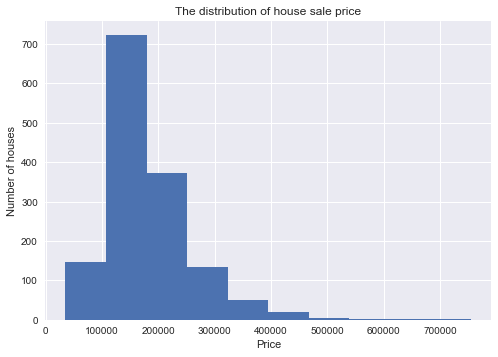

In [73]:
df['SalePrice'].plot(kind = 'hist')

plt.title('The distribution of house sale price')
plt.ylabel('Number of houses')
plt.xlabel('Price')
plt.show()

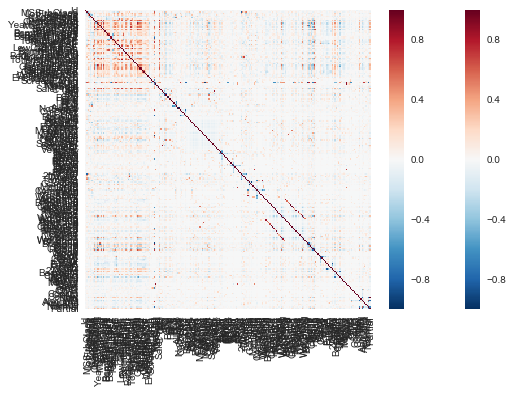

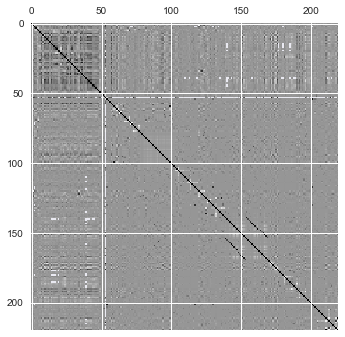

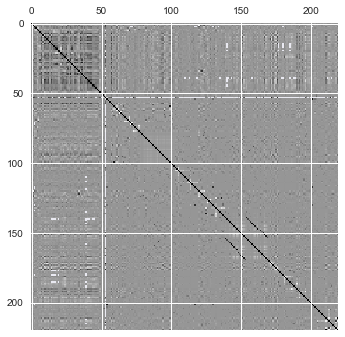

In [86]:
#Correlation matrix
plt.matshow(df.corr())
plt.show()

In [77]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,C (all),FV,RH,RL,RM,Grvl,Pave,Grvl,Pave,Bnk,HLS,Low,Lvl,AllPub,NoSeWa,Corner,CulDSac,FR2,FR3,Inside,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNn,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Flat,Gable,Gambrel,Hip,Mansard,Shed,ClyTile,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsbShng,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,AsbShng,AsphShn,Brk Cmn,BrkFace,CBlock,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,BrkCmn,BrkFace,None,Stone,BrkTil,CBlock,PConc,Slab,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,FuseA,FuseF,FuseP,Mix,SBrkr,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd,GdPrv,GdWo,MnPrv,MnWw,Gar2,Othr,Shed,TenC,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Id,1.000000,0.011156,-0.010601,-0.033226,0.024071,-0.005847,-0.041285,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,0.005039,0.029860,-0.041261,0.012356,0.017536,-0.019007,-0.005024,-0.033824,-0.005968,-0.007940,-0.015415,-0.015001,0.009821,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.014973,0.027239,-0.002701,-0.019772,0.027052,0.000072,0.008766,0.016570,0.017634,0.003646,-0.013292,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.269719,-0.006242,0.021172,0.000712,-0.021917,-0.024689,-0.012020,0.032453,0.031034,-0.032379,-0.008916,0.008916,0.002413,-0.001658,0.015040,0.016800,-0.008845,-0.015657,-0.013324,0.013324,-0.054832,-0.003973,0.015804,0.017722,0.040852,0.011187,0.004218,-0.002825,0.002039,-0.041662,-0.002939,0.031860,0.020865,0.010585,-0.050869,0.000644,0.012646,0.007591,0.009520,0.050052,0.034188,-0.067622,-0.024950,0.034681,-0.008031,-0.031818,0.014985,-0.019097,0.021925,-0.023069,-0.019103,0.028614,-0.004457,-0.010127,0.000825,-0.022919,0.016785,-0.033086,0.000487,-0.011600,-0.049484,0.041539,-0.009100,-0.004877,0.031090,0.016989,-0.038754,-0.017741,-0.022777,0.028174,-0.003186,0.019292,-0.012724,-0.030540,-0.024046,0.040840,-0.029043,0.045740,0.035313,0.013775,-0.028481,-0.037860,0.033885,0.010271,-0.010835,-0.033633,0.008696,0.017486,-0.002153,0.006854,0.039786,0.006315,0.010591,0.028419,0.030282,-0.022465,0.031504,-0.007172,-0.008072,-0.026184,-0.012865,0.021657,-0.010964,-0.004717,0.014713,0.039786,0.010945,0.022900,0.004177,0.019772,-0.008355,-0.024483,0.042408,-0.006599,-0.016633,-0.024875,0.000827,-0.040379,-0.036425,0.024897,0.024760,0.003738,-0.004646,-0.005419,0.015695,0.024082,0.007447,0.036742,-0.038160,-0.000839,0.025656,0.050002,0.020986,-0.024989,-0.022635,-0.058838,-0.020592,0.040349,-0.003760,0.004024,0.041520,-0.015589,-0.017472,0.003919,0.010650,0.009162,-0.021589,0.002678,0.005141,0.005229,-0.048244,0.040780,-0.005157,0.021204,-0.016301,-0.004412,-0.058765,-0.020738,-0.018998,0.038920,0.026133,0.007009,-0.034852,-0.009018,0.004865,0.015881,-0.020738
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.115361,0.025672,0.053669,0.032628,-0.059316,0.027850,0.040581,0.022936,0.016178,-0.064686,0.080763,-0.005129,0.057653,0.033282,-0.069836,-0.022622,-0.065649,-0.140759,-0.238518,-0.019458,-0.101774,-